In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('Fish.csv')

In [3]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [4]:
df.shape

(159, 7)

In [5]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
import seaborn as sns

from matplotlib import pyplot as plt


<function matplotlib.pyplot.show(close=None, block=None)>

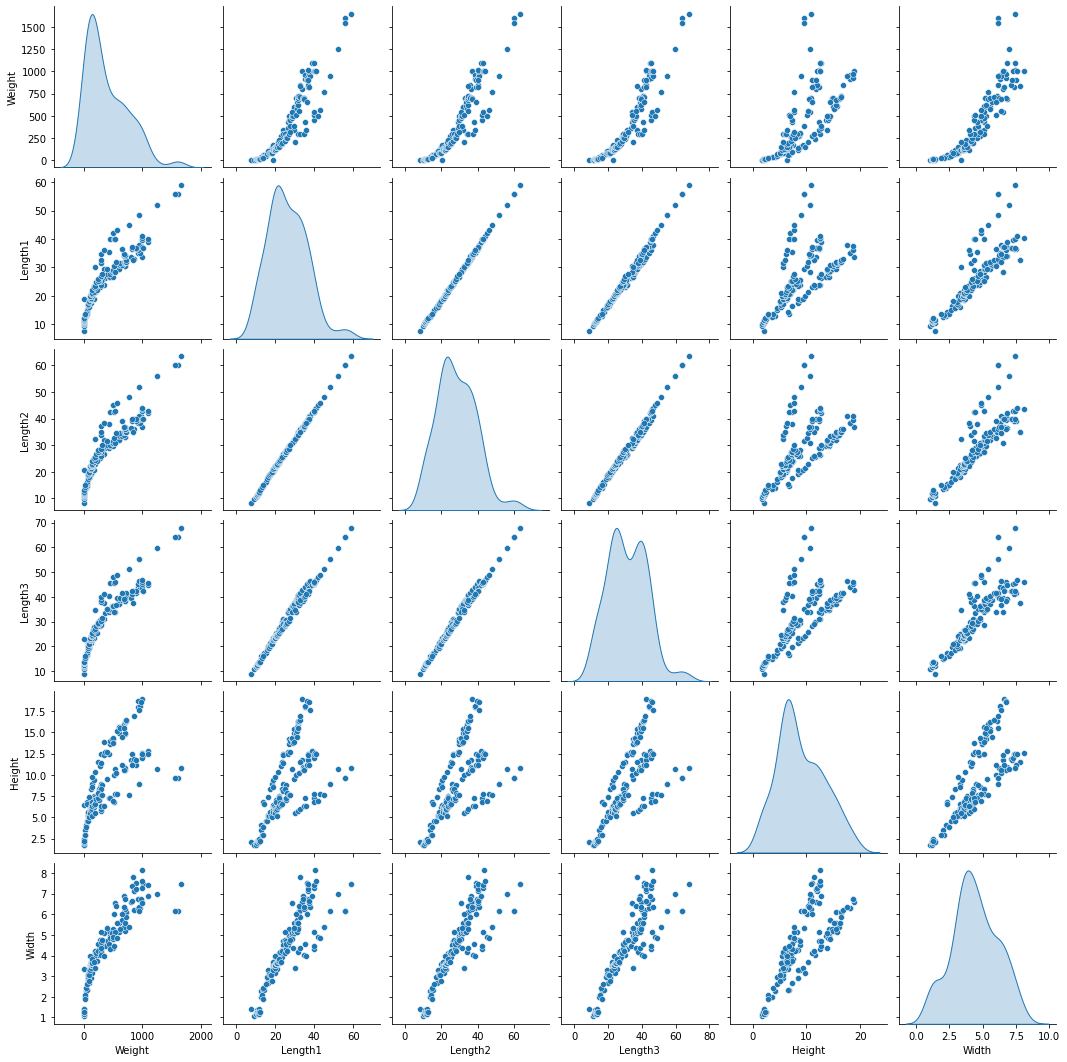

In [8]:
dl=df.iloc[:,2:]
sns.pairplot(df,diag_kind='kde')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

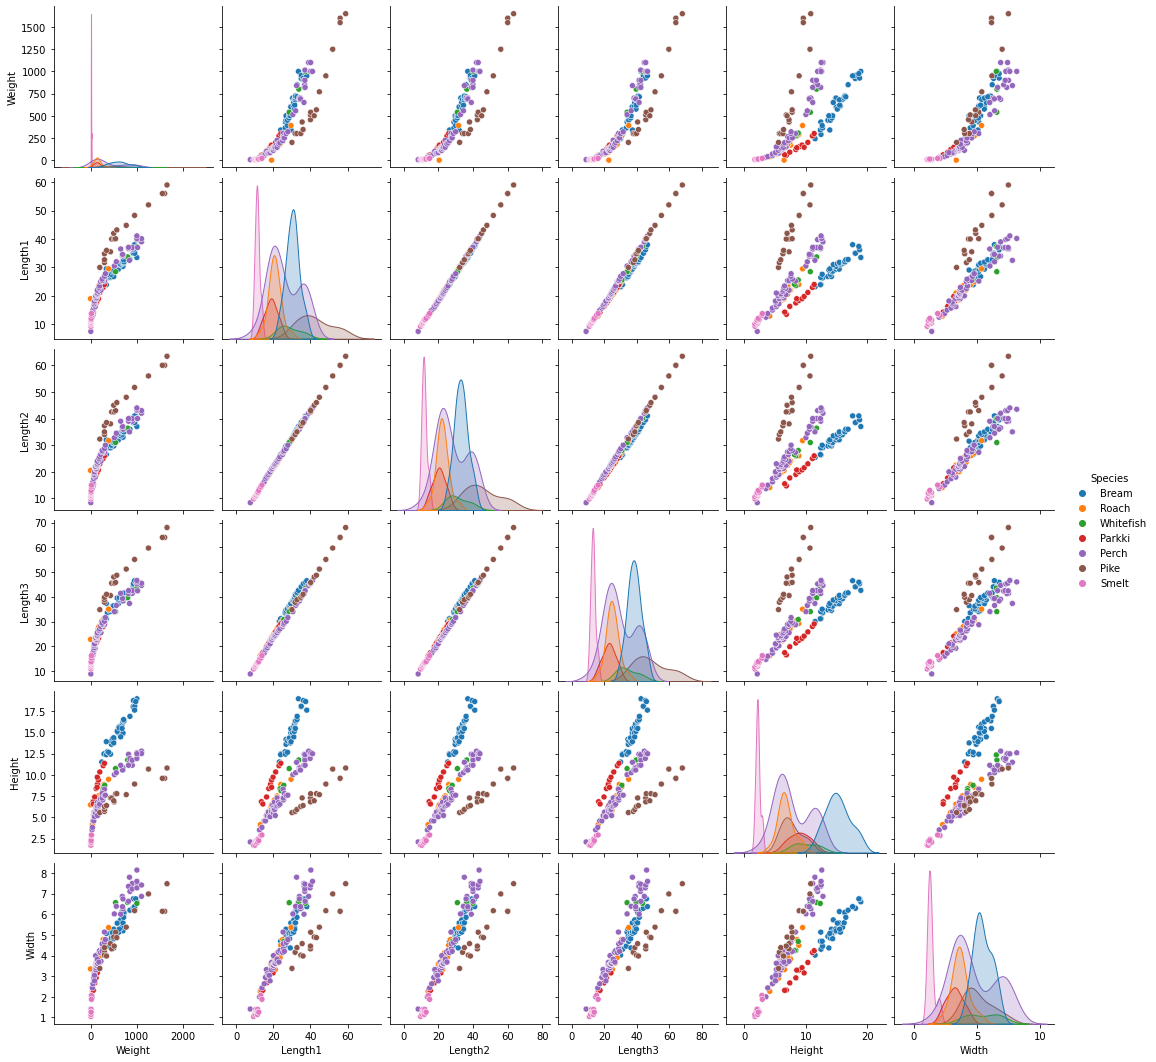

In [9]:
sns.pairplot(df, kind = 'scatter', hue = 'Species')
plt.show

In [10]:


#From the above pair plot, we can see that there seems to be some correlations between Height, Width and the Weight. Note that since we have multiple species the correlation between Height and Width of all species is not exactly linear with Weight.

#Now, since we have the final dataset ready lets analyze and remove the outliers if any

Text(0.5, 1.0, 'Outlier Detection based on Weight')

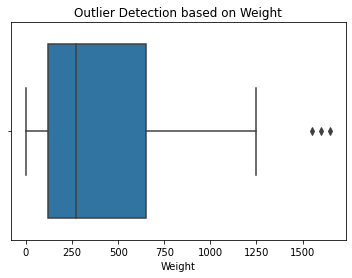

In [11]:
sns.boxplot(x=df['Weight'])
plt.title('Outlier Detection based on Weight')
#there is outlier present in the weight

Text(0.5, 1.0, 'Outlier Detection based on Height')

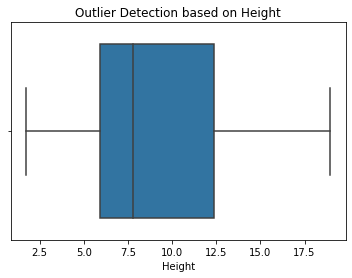

In [12]:
sns.boxplot(x =df['Height'])
plt.title('Outlier Detection based on Height')

Text(0.5, 1.0, 'Outlier Detection based on Width')

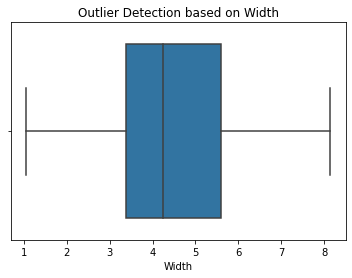

In [13]:
sns.boxplot(x =df['Width'])
plt.title('Outlier Detection based on Width')

Text(0.5, 1.0, 'Outlier Detection based on Length1')

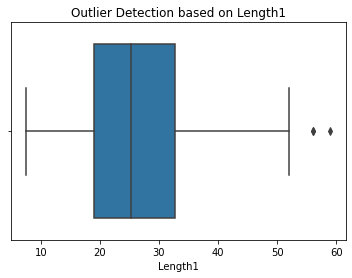

In [14]:
sns.boxplot(x =df['Length1'])
plt.title('Outlier Detection based on Length1')
#outlier present in Length1

Text(0.5, 1.0, 'Outlier Detection based on Length2')

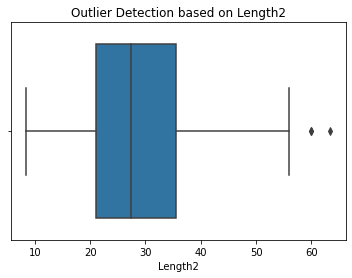

In [15]:
sns.boxplot(x =df['Length2'])
plt.title('Outlier Detection based on Length2')
#outliers present in length2

Text(0.5, 1.0, 'Outlier Detection based on Length3')

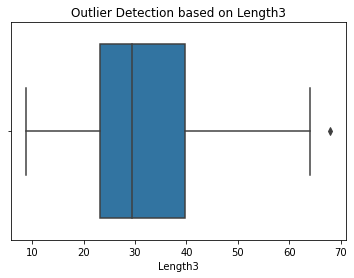

In [16]:
sns.boxplot(x =df['Length3'])
plt.title('Outlier Detection based on Length3')
#outliers present in Length3

In [17]:
def outlier_detection(dataframe):
  Q1 = dataframe.quantile(0.25)
  Q3 = dataframe.quantile(0.75)
  IQR = Q3 - Q1
  upper_end = Q3 + 1.5 * IQR
  lower_end = Q1 - 1.5 * IQR 
  outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
  return outlier

In [18]:
outlier_detection(df['Weight'])

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

In [19]:
outlier_detection(df['Length1'])

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

In [20]:
outlier_detection(df['Length2'])

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

In [21]:
outlier_detection(df['Length3'])

144    68.0
Name: Length3, dtype: float64

In [22]:
df=df.drop([142,143,144])

In [23]:
df.shape

(156, 7)

<function matplotlib.pyplot.show(close=None, block=None)>

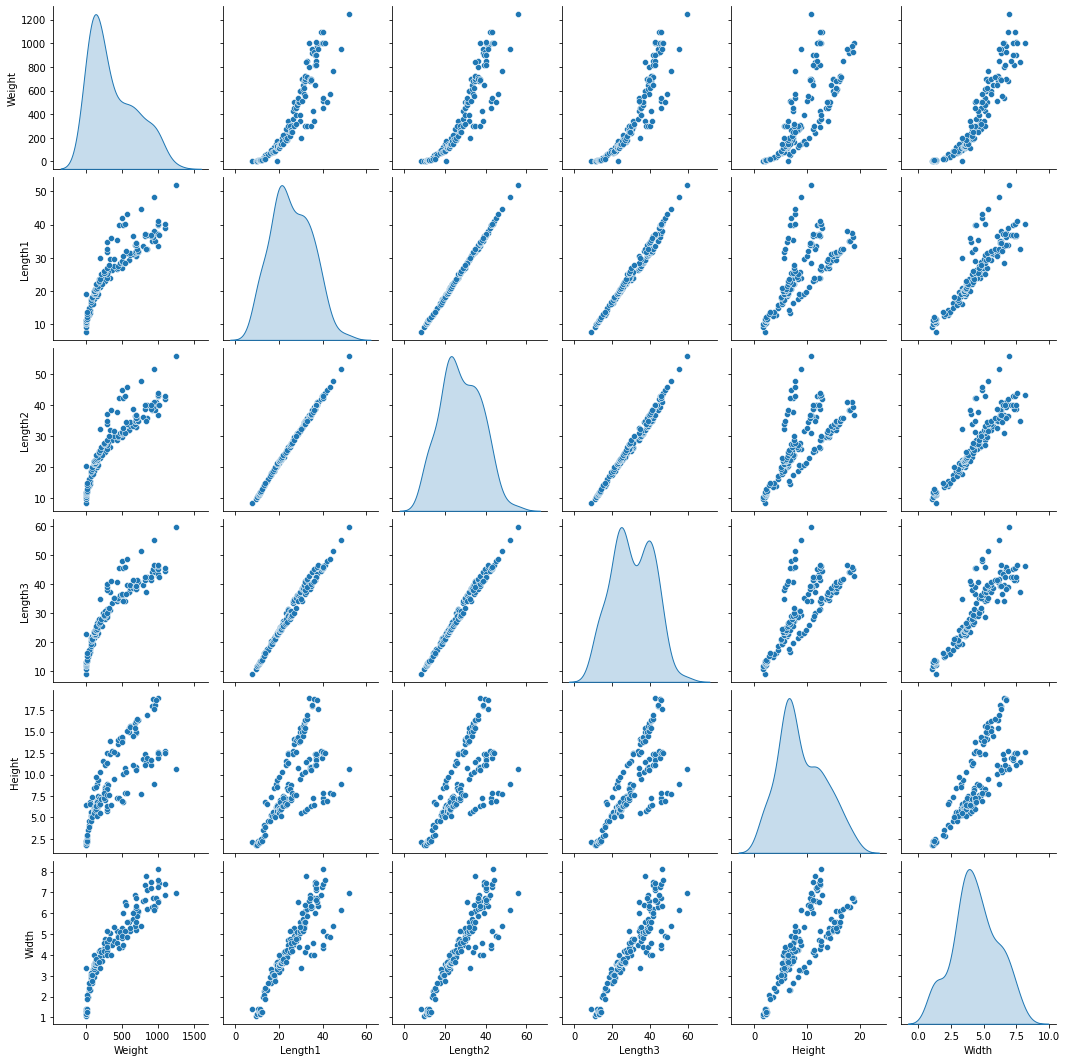

In [24]:
sns.pairplot(df,diag_kind='kde')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

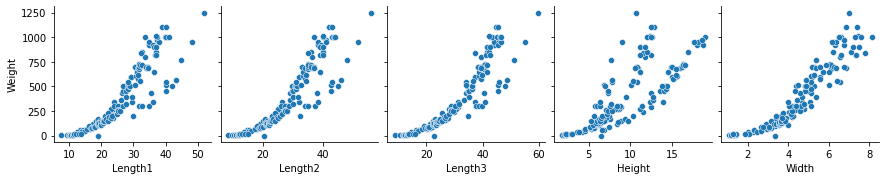

In [25]:
sns.pairplot(df, x_vars=['Length1','Length2','Length3','Height','Width'], y_vars=['Weight'], kind='scatter')
plt.show

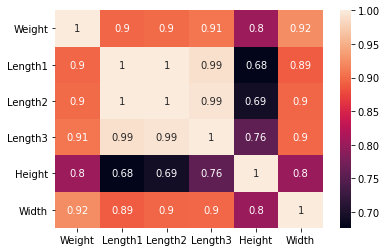

In [26]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
X=df.drop(df[['Weight','Species']],axis=1)
y=df[['Weight']]

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [30]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [31]:
for i, n in enumerate(X_train.columns):
    print("the coefficient for the {} is {}".format(n,lm.coef_[0][i]))

the coefficient for the Length1 is 97.24293067381456
the coefficient for the Length2 is -42.05899297815426
the coefficient for the Length3 is -36.53761974628233
the coefficient for the Height is 34.0630326938296
the coefficient for the Width is 63.11936595456453


In [32]:
import statsmodels.api as sm

In [33]:
X_train_sm = sm.add_constant(X_train)

c:\python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [34]:
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params


const     -422.221053
Length1     97.242931
Length2    -42.058993
Length3    -36.537620
Height      34.063033
Width       63.119366
dtype: float64

In [35]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     230.9
Date:                Sat, 07 Aug 2021   Prob (F-statistic):           6.13e-57
Time:                        10:03:56   Log-Likelihood:                -691.31
No. Observations:                 117   AIC:                             1395.
Df Residuals:                     111   BIC:                             1411.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -422.2211     28.182    -14.982      0.0